<a href="https://colab.research.google.com/github/Sarahiperbolica/Masterclass_OG_2025/blob/main/Soluzioni/Tuto_1_Q_transforms_ita_soluzioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="float: left;padding: 1.3em">![logo](https://github.com/gw-odw/odw-2024/blob/main/Tutorials/logo.png?raw=1)</span>

#  Gravitational Wave Workshop


#### Tutorial 1: Rappresentazioni dei dati  

In questo tutorial, esploreremo diversi modi di rappresentare i dati delle onde gravitazionali, tra cui:  

* **Spettrogrammi** – Un modo visivo per vedere come le frequenze cambiano nel tempo.  
* **Q-transform** – Un filtro speciale che aiuta a rilevare segnali di breve durata nei dati.  

Vuoi provarlo? **Clicca [questo link](https://colab.research.google.com/github/gw-odw/odw-2024/blob/main/Tutorials/Day_1/Tuto_1.4_Generating_waveforms.ipynb)** per aprire questo tutorial in **Google Colaboratory**, dove puoi eseguire il codice in modo interattivo! 🚀

##  Installazione


In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwpy'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.5 MB/s eta 0:00:00


**Important:** With Google Colab, you may need to restart the runtime after running the cell above.

## Inizializzazione

In [ ]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import gwpy

# Stima della densità spettrale di potenza  

I rivelatori di onde gravitazionali misurano **increspature estremamente deboli** nello spazio-tempo, ma le loro misurazioni sono piene di rumore. Il rumore è simile al fruscio di una radio: è casuale e rende difficile identificare il segnale reale. Per comprendere meglio i dati e distinguere il segnale delle onde gravitazionali dal rumore, analizziamo come il rumore e il segnale si comportano a diverse frequenze. È qui che entrano in gioco strumenti come la **Densità Spettrale di Potenza (PSD)** e la **Densità Spettrale di Ampiezza (ASD)**.  

## Densità Spettrale di Potenza  
La **Densità Spettrale di Potenza (PSD)** ci dice quanta "**potenza**" o intensità ha il segnale a ciascuna frequenza. Per esempio, immagina di ascoltare una canzone con il basso (bassa frequenza), la melodia (media frequenza) e i piatti della batteria (alta frequenza). La PSD ci aiuta a capire quanto del segnale proviene dal basso, dalla melodia o dai piatti, ma nel contesto delle onde gravitazionali, ci mostra quanto è forte il rumore o il segnale a diverse frequenze. Alcune frequenze potrebbero avere più rumore di altre, e la PSD ci permette di visualizzare questo andamento.  

Per calcolare la PSD, suddividiamo i dati in piccoli segmenti utilizzando uno strumento matematico chiamato **Trasformata di Fourier Veloce (FFT)**. Questo processo è simile a separare una canzone nelle sue singole "note" o frequenze. Poi, per ogni frequenza, calcoliamo la sua potenza elevando al quadrato la sua ampiezza. Per rendere la nostra stima più affidabile, mediamosi i valori di potenza da più segmenti di dati. Questo processo di media attenua le fluttuazioni casuali del rumore, permettendoci di ottenere una visione più chiara e accurata di come il segnale si comporta a ciascuna frequenza.  

## Densità Spettrale di Ampiezza  
La **Densità Spettrale di Ampiezza (ASD)** è semplicemente la radice quadrata della PSD. Invece di esprimere l'intensità del segnale in termini di potenza, che può crescere molto rapidamente, l'ASD la esprime in termini di **ampiezza**. Questo la rende più facile da interpretare e confrontare con i segnali delle onde gravitazionali che stiamo cercando. L'ASD è solitamente espressa in unità come metri per radice quadrata di hertz, un formato particolarmente utile per i rivelatori di onde gravitazionali.  

In sostanza, l'ASD ci permette di **misurare quanto è forte o debole il rumore** e i segnali a ciascuna frequenza. Mediando nel tempo, possiamo ridurre le fluttuazioni casuali del rumore e ottenere una comprensione più chiara sia delle caratteristiche del rumore sia delle onde gravitazionali che vogliamo rilevare. Questo processo è essenziale per interpretare i dati raccolti dagli osservatori di onde gravitazionali.

Analizzando l'evento GW170817 con tempo GPS 1187008882.4...
Scaricamento dei dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Scaricamento dei dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Calcolando l'ASD per il rivelatore H1...
Calcolando l'ASD per il rivelatore L1...


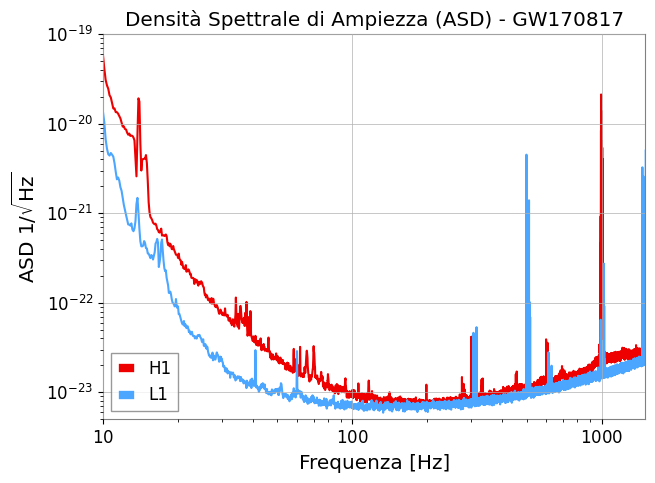

In [ ]:
from gwpy.timeseries import TimeSeries, TimeSeriesDict
from gwosc.datasets import event_gps
import matplotlib.pyplot as plt

def genera_ASD_per_evento(nome_evento, rivelatori=['H1', 'L1', 'V1']):
    """
    Genera la Densità Spettrale di Ampiezza (ASD) per un evento specifico.

    Parametri:
    - nome_evento: Nome dell'evento.
    - rivelatori: Lista dei rivelatori da utilizzare. Es. ['H1'] (default: tutti i rivelatori disponibili).

    Risultati:
    - Mostra il grafico ASD per i rivelatori coinvolti.
    """
    gps_time = event_gps(nome_evento)  # Ottiene il tempo GPS dell'evento
    print(f"Analizzando l'evento {nome_evento} con tempo GPS {gps_time}...")

    # Scarica i dati per i rivelatori disponibili
    dati = TimeSeriesDict()
    for rivelatore in rivelatori:
        try:
            print(f"Scaricamento dei dati per il rivelatore {rivelatore}...")
            dati[rivelatore] = TimeSeries.fetch_open_data(rivelatore, int(gps_time)-512, int(gps_time)+512, cache=True, verbose=True)
        except Exception as e:
            print(f"Impossibile scaricare i dati per {rivelatore}: {e}")

    # Inizializza un dizionario per i valori ASD
    ASDs = TimeSeriesDict()
    colori = {'H1': 'gwpy:ligo-hanford',
              'L1': 'gwpy:ligo-livingston',
              'V1': 'gwpy:virgo'}

    # Crea il grafico per visualizzare l'ASD
    fig, ax = plt.subplots(figsize=(7, 5))
    for rivelatore, TS in dati.items():
        print(f"Calcolando l'ASD per il rivelatore {rivelatore}...")
        ASDs[rivelatore] = TS.asd(8, 4)  # Calcola l'ASD con segmenti di 8 secondi e sovrapposizione di 4 secondi
        ax.loglog(ASDs[rivelatore].frequencies, ASDs[rivelatore].value, label=rivelatore, color=colori.get(rivelatore, 'black'))

    # Configura il grafico
    ax.set(xlim=(10, 1500), ylim=(5e-24, 1e-19), xlabel="Frequenza [Hz]", ylabel="ASD $1/\sqrt{\mathrm{Hz}}$")
    ax.legend()
    plt.title(f"Densità Spettrale di Ampiezza (ASD) - {nome_evento}")
    plt.show()

# Esempio per un evento famoso (GW170817) con selezione opzionale dei rivelatori
nome_evento = "GW170817"
genera_ASD_per_evento(nome_evento, rivelatori=['H1', 'L1'])

# Ora tocca a te!  

Puoi usare questa funzione per analizzare altri eventi di onde gravitazionali specificando il nome dell'evento. Ad esempio, prova con '**GW150914**' e '**GW170814**'!  

## Sperimenta di più!  

* Prova a tracciare l'ASD usando diverse combinazioni di rivelatori. Ad esempio, confronta i risultati utilizzando solo **H1**, solo **L1** o entrambi insieme.  
* Quali differenze noti tra i rivelatori?  
* Come cambia l'ASD per eventi di onde gravitazionali diversi?  
* Riesci a intuire perché alcuni rivelatori potrebbero avere una sensibilità maggiore o minore in certe gamme di frequenza?  

Pensa a queste domande e discuti le tue osservazioni! 🚀

## Soluzioni

Analizzando l'evento GW150914 con tempo GPS 1126259462.4...
Scaricamento dei dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]
Scaricamento dei dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]
Scaricamento dei dati per il rivelatore V1...
Impossibile scaricare i dati per V1: Cannot find a GWOSC dataset for V1 covering [1126258950, 1126259974)
Calcolando l'ASD per il rivelatore H1...
Calcolando l'ASD per il rivelatore L1...


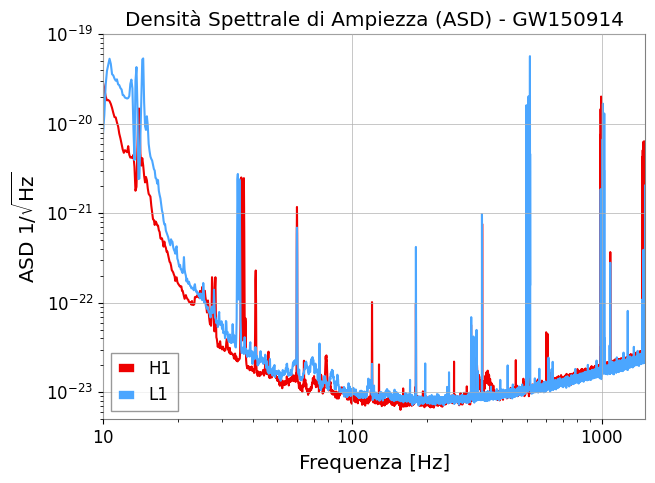

In [ ]:
genera_ASD_per_evento("GW150914")

Analizzando l'evento GW170814 con tempo GPS 1186741861.5...
Scaricamento dei dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Scaricamento dei dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Scaricamento dei dati per il rivelatore V1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Calcolando l'ASD per il rivelatore H1...
Calcolando l'ASD per il rivelatore L1...
Calcolando l'ASD per il rivelatore V1...


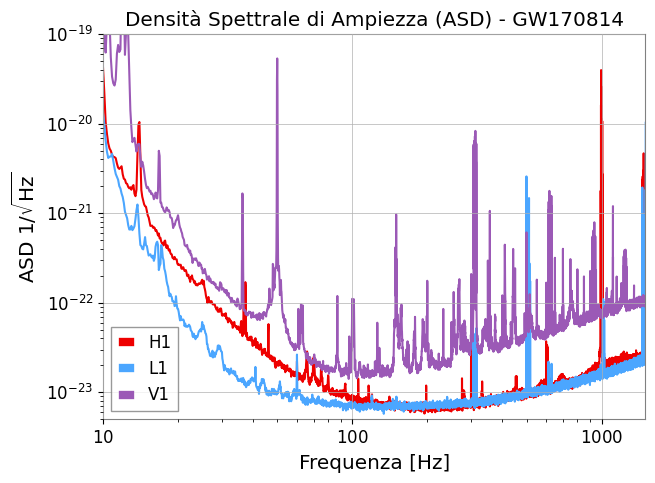

In [ ]:
nome_evento = "GW170814"
genera_ASD_per_evento(nome_evento)

# Visualizzare come le frequenze cambiano nel tempo  

La **Trasformata di Fourier Veloce (FFT)** e la **Densità Spettrale di Ampiezza (ASD)** ci forniscono un'istantanea delle frequenze presenti in un segnale durante un singolo intervallo di tempo. Tuttavia, i segnali possono variare nel tempo ed è spesso utile osservare come il loro contenuto in frequenza si evolve.  

Per fare ciò, utilizziamo i **spettrogrammi**. Uno spettrogramma è una rappresentazione visiva che mostra la FFT (o l'ASD) in diversi momenti nel tempo. Questo ci permette di tracciare come le componenti in frequenza di un segnale cambiano nel tempo attraverso un **grafico tempo-frequenza**.  

Per iniziare, ricarichiamo i nostri dati:

In [ ]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
print("GW170817 data")
print(ldata)

GW170817 GPS: 1187008882.4
GW170817 data
TimeSeries([2.06056010e-20, 1.59181918e-20, 2.18438811e-20, ...,
            1.25504332e-19, 1.23976846e-19, 1.22231459e-19]
           unit: dimensionless,
           t0: 1187008370.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


Ora possiamo generare uno **spettrogramma** scegliendo una specifica lunghezza per la **FFT**.  

🔹 **Nota importante:**  
Quando utilizziamo questi metodi, l'output viene fornito sotto forma di densità spettrali di potenza accumulate. Per convertirlo nella più familiare **Densità Spettrale di Ampiezza (ASD)**, prendiamo la radice quadrata dei valori.

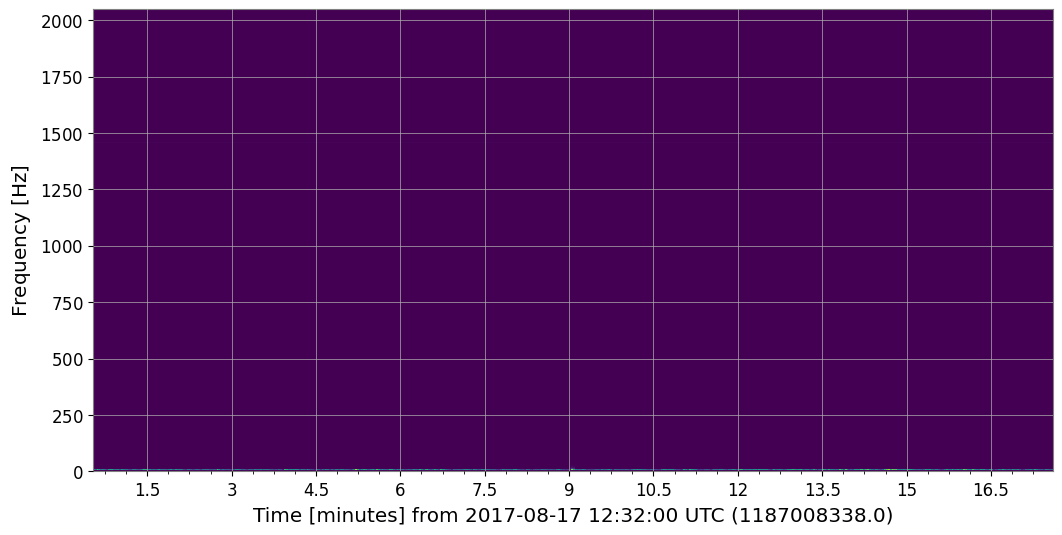

In [ ]:
%matplotlib inline
specgram = ldata.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

Hmm... qualcosa non torna. Riesci a trovare il singolo punto "caldo" (il più luminoso) in questa mappa dei colori? Sembra che la scala dei colori predefinita **non sia l'ideale** per mostrare l'intera gamma di valori.  

💡 **Prova questo:**  
Controlla i valori minimo (`specgram.min()`) e massimo (`specgram.max()`) per verificare se il problema è nella scala dei colori.  

Possiamo risolvere questo passando alcuni argomenti aggiuntivi al nostro grafico per **controllare meglio la visualizzazione** (soprattutto la colorazione):

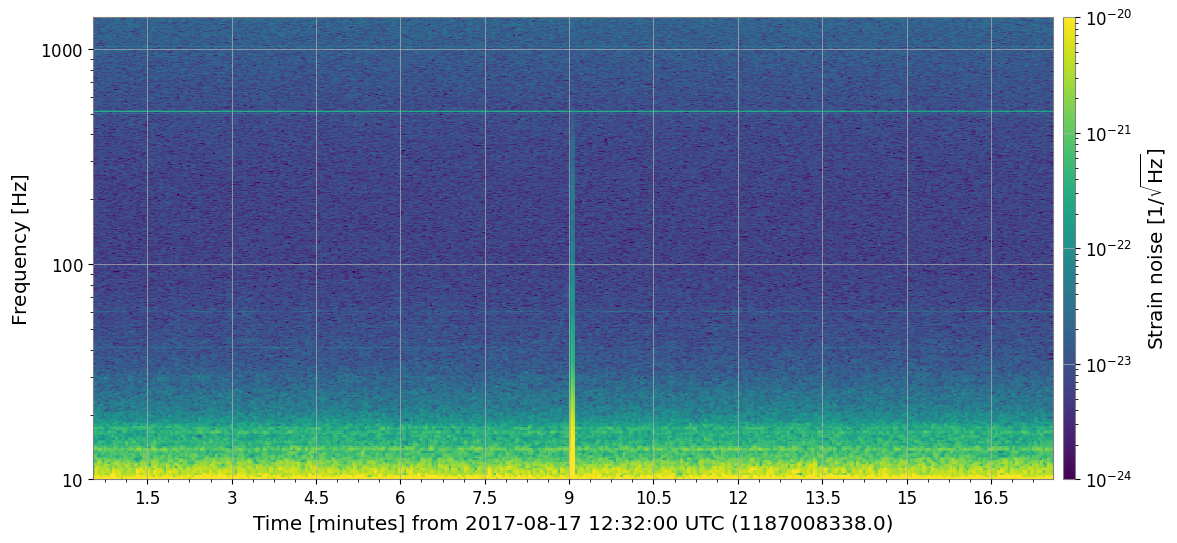

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

Qui possiamo vedere come la **Densità Spettrale di Ampiezza (ASD)** per il rivelatore **LIGO-Livingston** cambia in un periodo di circa **17 minuti** intorno all'evento **GW170817**.  

🔹 **Le ASD coprono quattro ordini di grandezza**, ed è per questo che il nostro primo tentativo mostrava un'immagine quasi completamente blu scuro—il contrasto non era impostato correttamente!  

### 🔍 Cosa possiamo osservare?  

* Il **rumore a bassa frequenza (<30 Hz)** fluttua nel tempo, creando un effetto di "rimbombo".  
* Le **alte frequenze (>100 Hz)** rimangono **abbastanza stabili**.  
* Le **frequenze intermedie (30-100 Hz)** mostrano caratteristiche strette che appaiono e scompaiono, indicando la presenza di **rumore non stazionario** che influisce sulle misurazioni.  

### 💡 Rifletti su questo:  
Perché pensi che alcune frequenze siano più stabili mentre altre cambiano nel tempo? Cosa potrebbe causare questo **rumore non stazionario**?

Questa funzione `create_spectrogram` genera facilmente uno spettrogramma per visualizzare come il contenuto in frequenza di un segnale di onda gravitazionale cambia nel tempo.

In [ ]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

def create_spectrogram(nome_evento, time_range=600, rivelatore='L1'):
    """
    Crea uno spettrogramma per un evento specifico di onde gravitazionali.

    Parametri:
    - nome_evento: Nome dell'evento (es. "GW170814").
    - time_range: Finestra temporale in secondi attorno al tempo GPS dell'evento (default: 600 secondi).
    - rivelatore: Nome del rivelatore da analizzare (default: 'L1').

    Risultati:
    - Visualizza lo spettrogramma per il rivelatore selezionato.
    """
    gps_time = event_gps(nome_evento)
    print(f"Creando lo spettrogramma per l'evento {nome_evento} con il tempo GPS {gps_time} utilizzando il rivelatore {rivelatore}...")

    x_range = time_range / 2

    # Scarica i dati per il rivelatore selezionato
    try:
        print(f"Scaricando i dati per il rivelatore {rivelatore}...")
        data = TimeSeries.fetch_open_data(rivelatore, int(gps_time)-x_range, int(gps_time)+x_range, cache=True, verbose=True)
    except Exception as e:
        print(f"Impossibile scaricare i dati per {rivelatore}: {e}")
        return

    # Calcola lo spettrogramma
    specgram = data.crop(gps_time-x_range, gps_time+x_range).spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)

    # Traccia lo spettrogramma
    plot = specgram.plot(epoch=gps_time, figsize=(7, 5))
    ax = plot.gca()
    ax.set_yscale('log')
    ax.set_ylim(10, 1400)
    ax.colorbar(
        clim=(1e-24, 1e-20),
        norm="log",
        label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
    )
    plt.title(f"Spettrogramma - {nome_evento} ({rivelatore})")
    plt.show()


## Ora tocca a te!

Puoi usare questa funzione per analizzare altri eventi di onde gravitazionali specificando il nome dell'evento. Ad esempio, prova con 'GW150914' o 'GW170814'!

Attenzione, la funzione richiede anche di specificare il nome del rivelatore che vuoi usare (ad esempio 'L1', 'H1' o 'V1') e l'intervallo di tempo in secondi attorno al tempo GPS (in secondi!!).

Prova ad esempio con l'evento 'GW150914', il rivelatore 'L1' e un intervallo di 10 minuti.

# Soluzione

Creando lo spettrogramma per l'evento GW170814 con il tempo GPS 1186741861.5 utilizzando il rivelatore L1...
Scaricando i dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1186741561 .. 1186742161))
Reading data... [Done]


/usr/local/lib/python3.11/dist-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


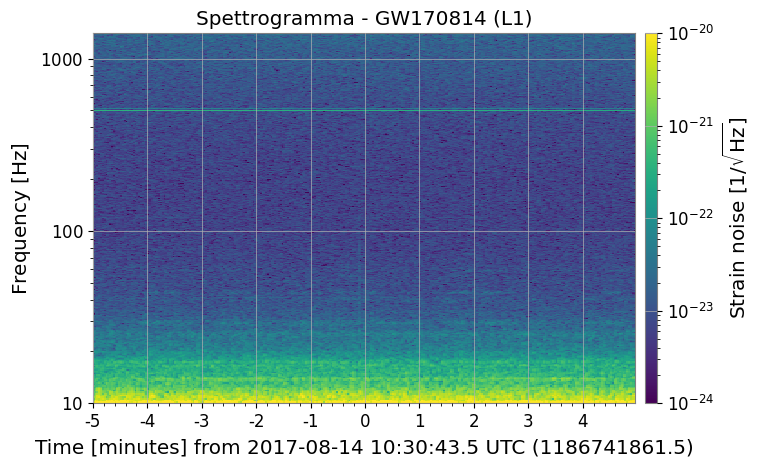

In [ ]:
nome_evento = "GW170814"
create_spectrogram(nome_evento, time_range=600, rivelatore='L1')

Creando lo spettrogramma per l'evento GW150914 con il tempo GPS 1126259462.4 utilizzando il rivelatore L1...
Scaricando i dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1126259162 .. 1126259762))
Reading data... [Done]


/usr/local/lib/python3.11/dist-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


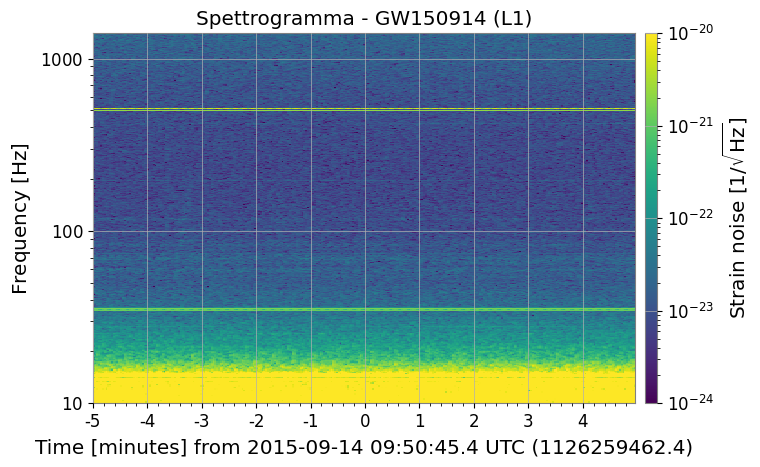

In [ ]:
nome_evento = "GW150914"
create_spectrogram(nome_evento, time_range=600, rivelatore='L1')

# Q-Transforms: Un Nuovo Modo di Visualizzare i Segnali

Lo spettrogramma che abbiamo usato prima è ottimo per mostrare come la densità spettrale di potenza (PSD) cambi nel tempo. Ci aiuta a vedere le tendenze a lungo termine su come varia la sensibilità dei rivelatori di onde gravitazionali (GW)—in minuti o anche ore.

Ma cosa succede se vogliamo fare uno zoom e vedere caratteristiche di breve durata nel segnale?

Il **Q-transform** è un tipo speciale di filtro che ci aiuta a creare una rappresentazione tempo-frequenza dei nostri dati. A differenza degli spettrogrammi normali, consente di:
* Rilevare **caratteristiche a diverse frequenze** in modo più chiaro.
* Osservare come i segnali si evolvono in **periodi di tempo molto brevi**.
* Analizzare i segnali senza bisogno di molta conoscenza preliminare sulla loro forma o struttura.

Perché è Utile?

I segnali delle onde gravitazionali sono spesso **picchi brevi** che durano solo frazioni di secondo. Un Q-transform aiuta gli scienziati a rilevare e studiare questi segnali in modo più dettagliato.

📖 Vuoi saperne di più? Dai un'occhiata a questo [articolo](https://doi.org/10.1088/0264-9381/21/20/024) per esplorare come il Q-transform viene utilizzato nella ricerca sulle onde gravitazionali!

Prima, ricarichiamo alcuni dati da LIGO Hanford attorno all'evento GW170817:

In [ ]:
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


Ora possiamo usare il metodo `q_transform()` del `TimeSeries` di `hdata` per creare la nostra rappresentazione tempo-frequenza (come uno [spettrogramma](https://gwpy.github.io/docs/stable/spectrogram/)).

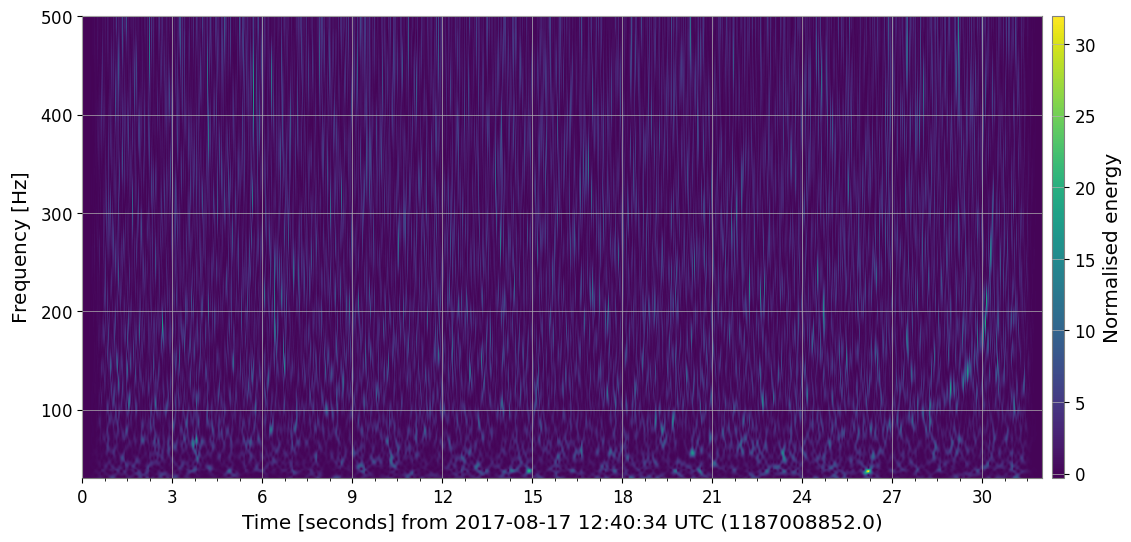

In [ ]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

Con il Q-transform, otteniamo un modo diverso di visualizzare i nostri dati delle onde gravitazionali.

* A differenza di uno spettrogramma normale, il Q-transform mostra l'**energia normalizzata** (di default).
* Questo significa che il **rumore a bassa frequenza** (che abbiamo visto prima) è ora molto **meno** evidente.
* Al contrario, possiamo vedere più **chiaramente** i rumori a **frequenze più alte**!

Per ottenere una visualizzazione ancora migliore di ciò che sta accadendo, possiamo regolare le impostazioni di visualizzazione per pulire la visualizzazione.

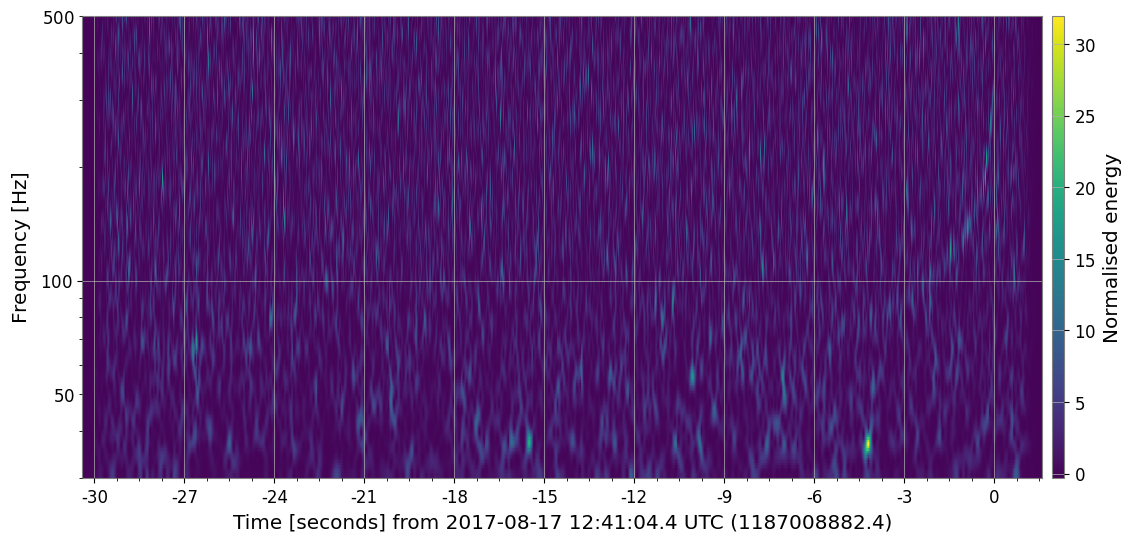

In [ ]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

Ora possiamo vedere un carattere più chiaro che emerge intorno ai -6 secondi. Ti sembra familiare? 🤔

* Utilizzando ciò che sappiamo sulla trasformata Q, possiamo regolare le sue impostazioni per concentrarci su caratteristiche specifiche nei dati.
* Selezionando una **gamma più specifica** di valori 'Q', possiamo risolvere (o affinare) meglio questa caratteristica e comprenderla più chiaramente.

I segnali delle onde gravitazionali possono essere nascosti nel rumore, e a volte piccole regolazioni fanno una grande differenza in ciò che possiamo rilevare. Scegliere l'intervallo giusto di Q può aiutare a rivelare dettagli che altrimenti potrebbero essere persi!

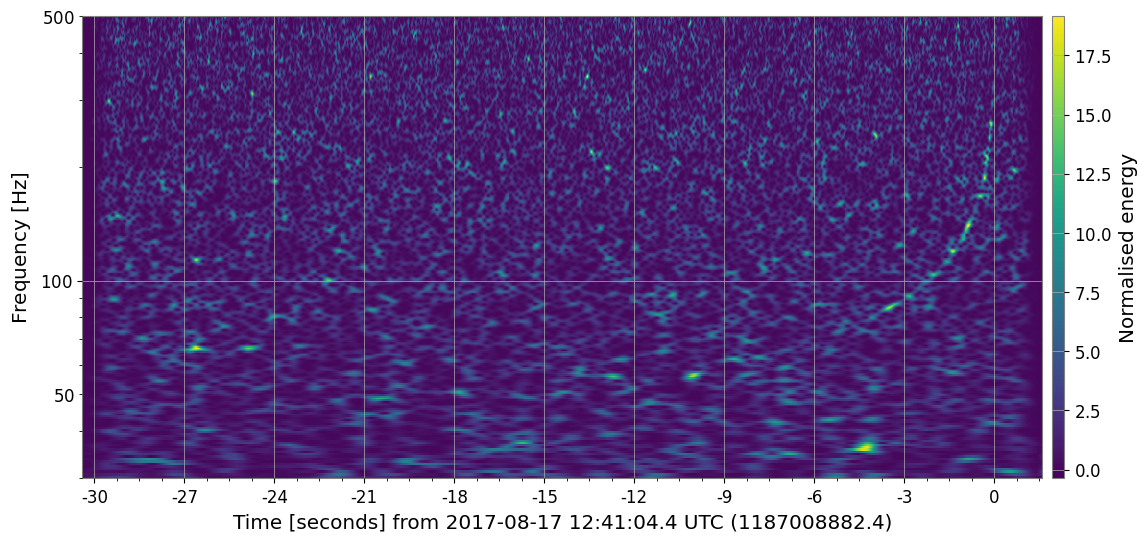

In [ ]:
#-- Usa qrange per migliorare le feature
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Ora possiamo vedere una **bellissima** e chiara traccia di una **fusione di Stelle di Neutroni Binaria (BNS)**! 🚀

* Il segnale diventa visibile a partire da circa -4 secondi (o forse anche da -10 secondi se guardi attentamente).
* La traccia continua fino al momento della fusione a T = 0.
* Questo è esattamente ciò che ci aspettiamo da una fusione BNS: un segnale che **aumenta gradualmente** in frequenza fino a quando le due stelle di neutroni si scontrano finalmente.

💡 Suggerimento: Possiamo usare l'opzione outseg per fare uno zoom sul momento esatto della fusione! Questo ci aiuta a concentrarci sulla parte più interessante del segnale senza rumore extra.

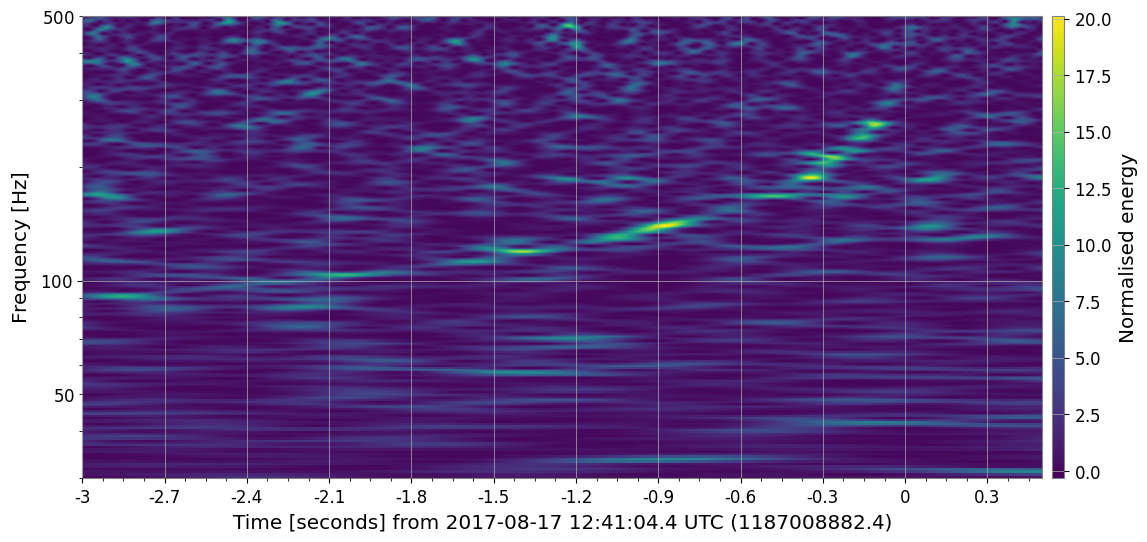

In [ ]:
#-- Usa OUTSEG per un piccolo time range
hq2 = hdata.q_transform(frange=(30, 500), qrange=(80, 110), outseg=(gps-3,gps+0.5))
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Possiamo ripetere l'esercizio utilizzando i dati di LIGO-Livingston per vedere qualcosa di ancora più straordinario.  
Prima scarichiamo e filtriamo i dati di Livingston:

In [ ]:
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


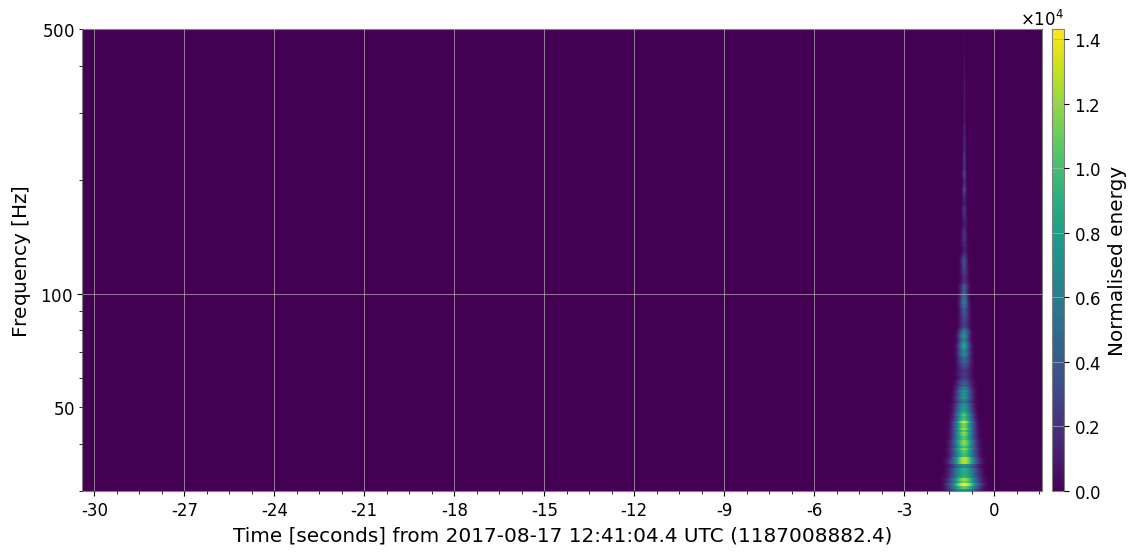

In [ ]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Ora notiamo qualcosa di sorprendente:  
* Appare una gigantesca esplosione di energia—1.000 volte più forte di quella che vediamo nei dati di LIGO-Hanford!  
* Ma è davvero parte del segnale delle onde gravitazionali? 🤔

Come si scopre, è avvenuto un **malfunzionamento strumentale** esattamente nello stesso momento del fusione BNS in LIGO-Livingston. Questo significa che il vero segnale astrofisico è **mescolato** con del rumore indesiderato proveniente dallo stesso rivelatore.

Fortunatamente, possiamo **ridimensionare i dati per ridurre l'effetto** del malfunzionamento e rendere il vero segnale delle onde gravitazionali più visibile!

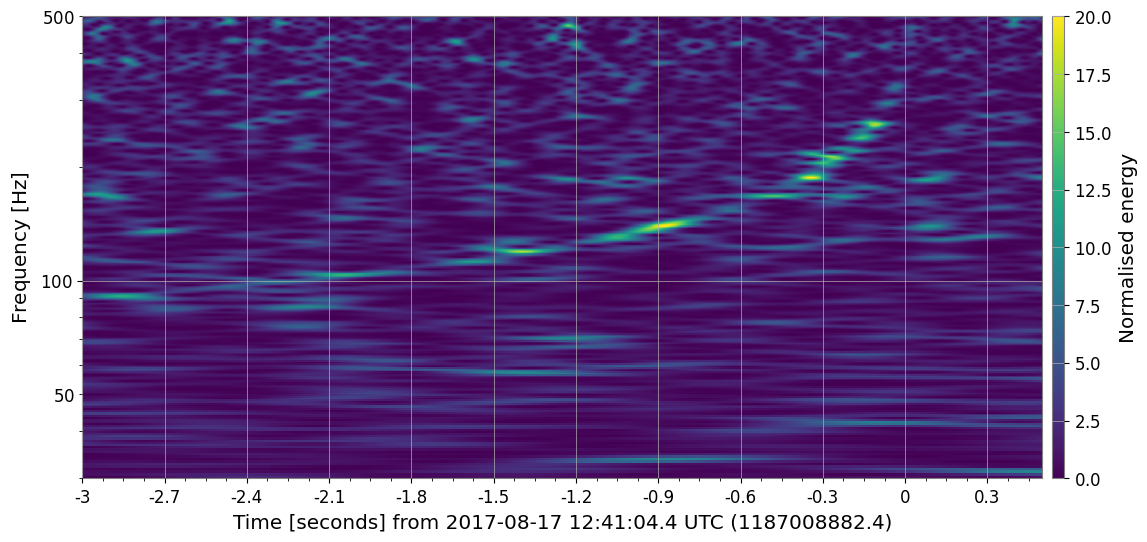

In [ ]:
%matplotlib inline
plot.colorbars[0].mappable.set_clim(0,20)
plot.figure.canvas.draw()
plot

Ora possiamo vedere la **traccia del segnale BNS fino a T=-28 secondi** nei dati di LIGO-Livingston!

Tuttavia, c'è ancora il grande malfunzionamento che rende difficile vedere il segnale vicino alla fusione. Un malfunzionamento così forte è particolarmente problematico per qualsiasi analisi che voglia utilizzare questi dati. Per affrontare questi tipi di malfunzionamenti forti, viene comunemente utilizzata una tecnica chiamata **gating**. Useremo il metodo `gwpy.TimeSeries.gate()` per applicare il gating ai dati.

Applichiamo ora i gate ai dati di Livingston e rifacciamo il grafico:

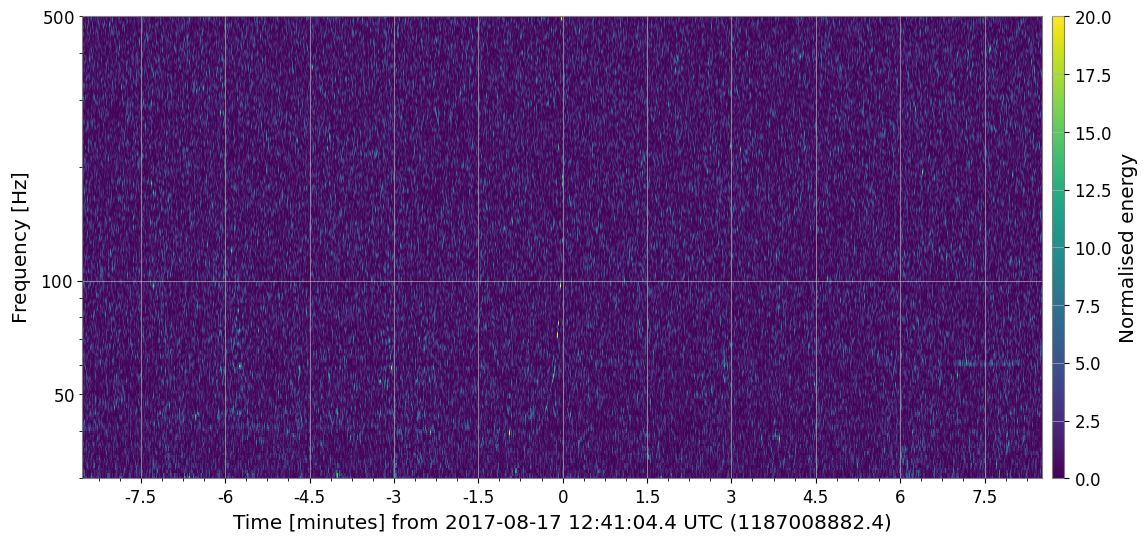

In [ ]:
# Usa il gating per rimuovere il rumore strumentale (glitch)
gated_ldata = ldata.gate(tzero=0.25, tpad=0.25)

gated_lq = gated_ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = gated_lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.colorbars[0].mappable.set_clim(0,20)

Ora il segnale è un po' più facile da vedere, ma alcuni dei nostri dati sono mancanti. Pertanto, il gating può essere un ottimo modo per affrontare malfunzionamenti forti, ma dovrebbe essere utilizzato con parsimonia.

Questa funzione esegue una Q-scan, un tipo speciale di analisi tempo-frequenza, per un determinato evento di onda gravitazionale. Ci aiuta a visualizzare come il segnale si comporta attraverso diverse frequenze nel tempo.

In [ ]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

def q_scan_event(nome_evento, tipo_evento, rivelatori=['H1','L1','V1']):
    """
    Esegue una Q-scan per un evento di onda gravitazionale specifico utilizzando uno o più rivelatori.

    Parametri:
    - nome_evento: Nome dell'evento (es. "GW170814").
    - tipo_evento: Tipo di evento, 'BNS' (neutron star binaria) o 'BBH' (binale buco nero).
    - rivelatori: Lista dei nomi dei rivelatori da utilizzare (es. ['H1', 'L1'] o ['V1']).

    Output:
    - Visualizza un grafico Q-scan per i rivelatori selezionati.
    """
    gps_time = event_gps(nome_evento)
    print(f"Creando Q-scan per l'evento {nome_evento} ({tipo_evento}) con tempo GPS {gps_time} usando i rivelatori {rivelatori}...")

    # Imposta i parametri in base al tipo di evento
    if tipo_evento == 'BNS':
        frange = (30, 500)  # Intervallo di frequenze
        qrange = (100, 110)  # Intervallo di Q
        time_window = (-3, 0.5)  # Tempo attorno al GPS
    elif tipo_evento == 'BBH':
        frange = (20, 500)
        qrange = (4, 12)
        time_window = (-0.1, 0.05)
    else:
        print("Tipo di evento non riconosciuto. Usa 'BNS' o 'BBH'.")
        return

    dati = TimeSeriesDict()
    for ifo in rivelatori:
        try:
            print(f"Scaricando i dati per il rivelatore {ifo}...")
            dati[ifo] = TimeSeries.fetch_open_data(ifo, int(gps_time)-512, int(gps_time)+512, cache=True, verbose=True)
        except Exception as e:
            print(f"Impossibile scaricare i dati per {ifo}: {e}")

    # Q-scan per ogni rivelatore
    fig, ax = plt.subplots(ncols=len(dati), figsize=(14, 4), sharey=True)
    for n, (ifo, TS) in enumerate(dati.items()):
        print(f"Eseguendo la trasformata Q per il rivelatore {ifo}...")
        QT = TS.q_transform(frange=frange, qrange=qrange, outseg=(gps_time + time_window[0], gps_time + time_window[1]))
        QT = QT.abs() ** 0.5

        xt = QT.times.value
        xt -= gps_time

        pcm = ax[n].pcolormesh(xt, QT.frequencies.value, QT.value.T, vmin=1, vmax=5, cmap='viridis')
        ax[n].set(yscale='log', xlabel="Tempo [sec]", title=ifo)

    ax[0].set_ylabel("Frequenza [Hz]")
    ax[-1].colorbar(label="Energia normalizzata")
    fig.subplots_adjust(wspace=0.05)

    plt.suptitle(f"Q-scan - {nome_evento} ({tipo_evento})")
    plt.show()


## Ora tocca a te!
Esegui la funzione con eventi e rivelatori diversi! Fai attenzione, la funzione richiede il nome dell'evento (ad esempio, "GW170814") e il suo tipo (BNS per Neutron Star Binaria o BBH per Black Hole Binario), verifica il tipo dell'evento prima di procedere!

* Confronta i segnali: come si differenziano le fusioni BNS e BBH? 🤔
* Perché una fusione di Neutron Star Binaria (BNS) impiega più tempo a fondersi rispetto a una fusione di Black Hole Binario (BBH)?
* Perché è importante avere più di un rivelatore?

## Soluzioni

Creando Q-scan per l'evento GW170814 (BBH) con tempo GPS 1186741861.5 usando i rivelatori ['H1', 'L1', 'V1']...
Scaricando i dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Scaricando i dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Scaricando i dati per il rivelatore V1...
Fetched 1 URLs from gwosc.org for [1186741349 .. 1186742373))
Reading data... [Done]
Eseguendo la trasformata Q per il rivelatore H1...
Eseguendo la trasformata Q per il rivelatore L1...
Eseguendo la trasformata Q per il rivelatore V1...


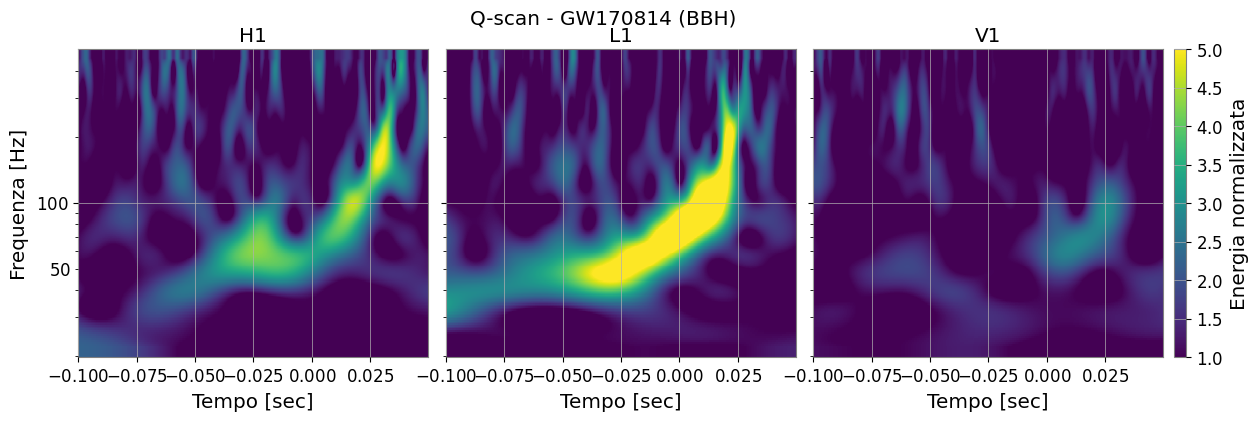

In [ ]:
nome_evento = "GW170814"
tipo_evento = 'BBH'  # Tipo di evento: BBH (binary black hole)
q_scan_event(nome_evento, tipo_evento)



Creando Q-scan per l'evento GW150914 (BBH) con tempo GPS 1126259462.4 usando i rivelatori ['H1', 'L1', 'V1']...
Scaricando i dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]
Scaricando i dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]
Scaricando i dati per il rivelatore V1...
Impossibile scaricare i dati per V1: Cannot find a GWOSC dataset for V1 covering [1126258950, 1126259974)
Eseguendo la trasformata Q per il rivelatore H1...
Eseguendo la trasformata Q per il rivelatore L1...


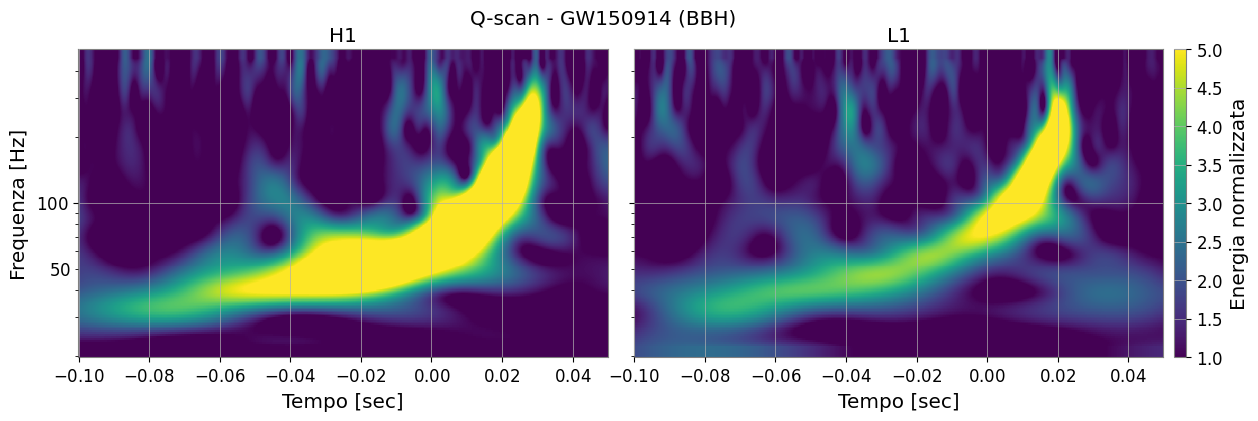

In [ ]:
nome_evento = "GW150914"
tipo_evento = 'BBH'
q_scan_event(nome_evento, tipo_evento)

Creando Q-scan per l'evento GW170817 (BNS) con tempo GPS 1187008882.4 usando i rivelatori ['H1', 'L1', 'V1']...
Scaricando i dati per il rivelatore H1...
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Scaricando i dati per il rivelatore L1...
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Scaricando i dati per il rivelatore V1...
Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]
Eseguendo la trasformata Q per il rivelatore H1...
Eseguendo la trasformata Q per il rivelatore L1...
Eseguendo la trasformata Q per il rivelatore V1...


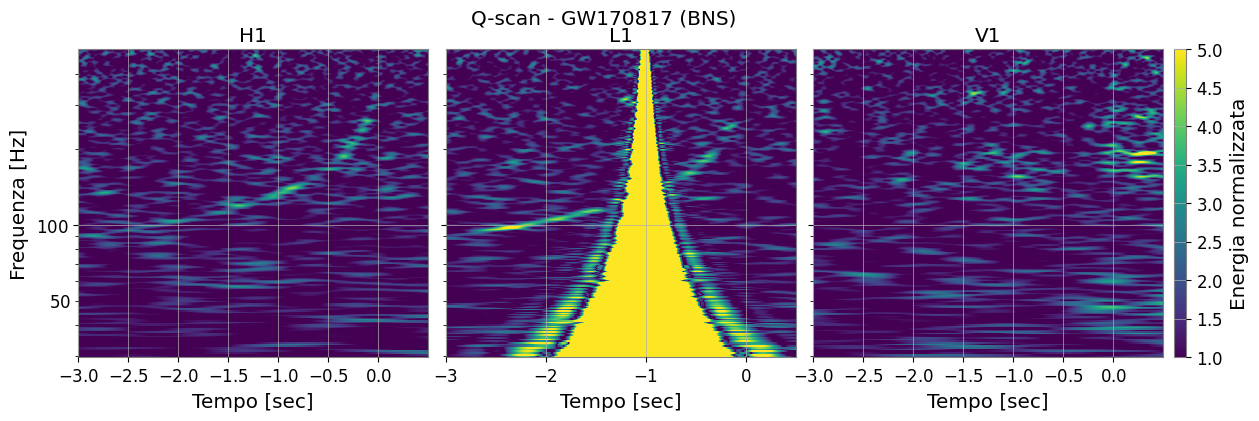

In [ ]:
nome_evento = "GW170817"
tipo_evento = 'BNS'
q_scan_event(nome_evento, tipo_evento)